In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Đọc dữ liệu
df = pd.read_csv(r"C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\Data.csv")

In [19]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [20]:
# Chọn các cột liên quan
features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
data = df[features]

In [21]:
# Tính Q1 và Q3
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Xác định phạm vi hợp lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu không có outliers
df_clean = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]

print(f"Số lượng dòng trước khi loại bỏ outliers: {df.shape[0]}")
print(f"Số lượng dòng sau khi loại bỏ outliers: {df_clean.shape[0]}")

Số lượng dòng trước khi loại bỏ outliers: 517
Số lượng dòng sau khi loại bỏ outliers: 454


In [22]:
# Chia dữ liệu thành X và y
X = df_clean.drop('area', axis=1)
y = df_clean['area']

In [23]:
# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Dự đoán
y_pred = model.predict(X_test_scaled)

In [27]:
# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 3.8767717651207487


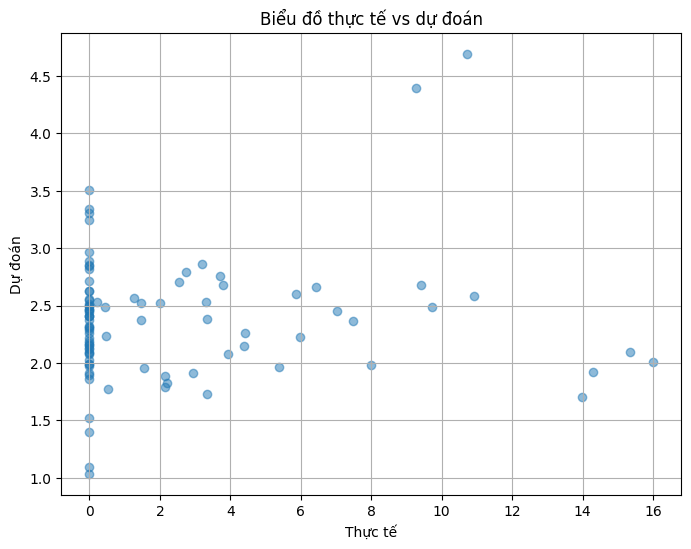

In [28]:
# Vẽ biểu đồ thực tế vs dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Thực tế")
plt.ylabel("Dự đoán")
plt.title("Biểu đồ thực tế vs dự đoán")
plt.grid(True)
plt.show()

Khi bỏ các giá trị 'area' ngoại lai thì có vẻ biểu đồ này có sự phân tán nhẹ nhàng hơn, trong khi biểu đồ thứ hai có nhiều điểm lệch ra xa trục.